## Building a the linear regression model using scikit learn in boston data to predict the Price "MEDV"  based on other dependent variable.

In [1]:
# importing labraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [4]:
#loading Boston data set
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data,columns = load_boston().feature_names)

In [28]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [29]:
#attaching our target price to the data set
df['MEDV'] = boston.target

In [37]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
df.shape

(506, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
# checking for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [36]:
# geneerating the corellation values
cor = df.corr()

<AxesSubplot:>

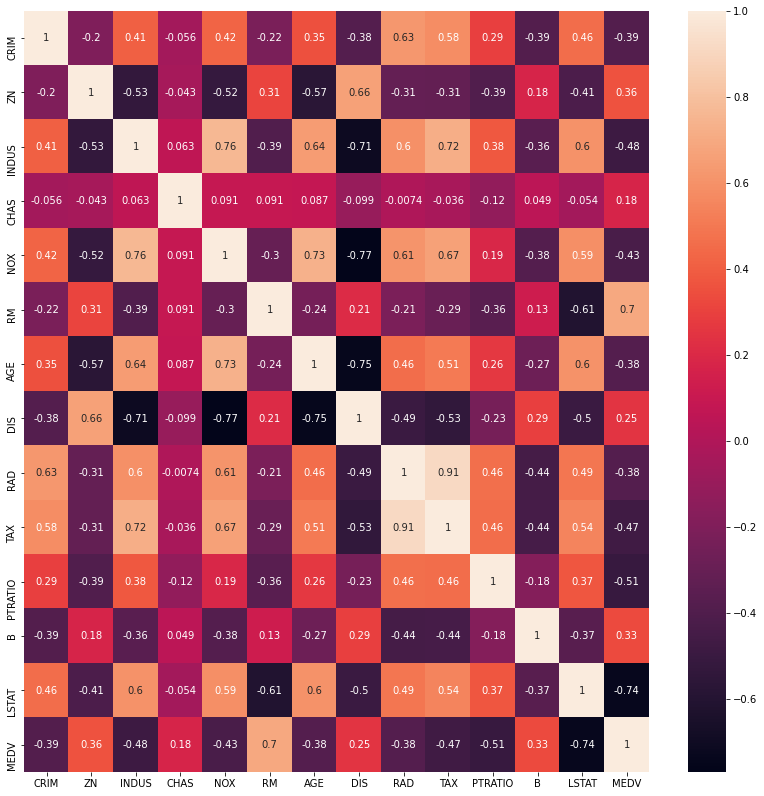

In [35]:
#plotting a heat map to plot the corelation for better viewing and identification of corelllation
plt.figure(figsize=(14, 14))
sns.heatmap(cor,annot = True)

#### From the above heat map we notice that there is 
> a high positive correlation of 0.7 between 'RM' and 'MEDV'  and 

> a high negative correlation  of -0.74 betweeen "LSTAT" and  "MEDV"

Being the only highly correlataed features, we willl select them

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

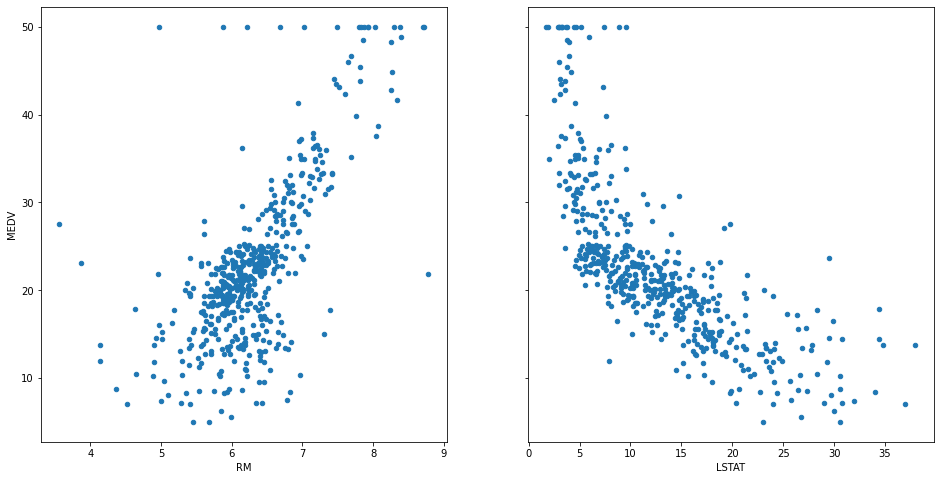

In [39]:
fig, axs = plt.subplots(1,2, sharey =True)
df.plot(kind='scatter',x = 'RM',y = 'MEDV', ax = axs[0], figsize = (16,8))
df.plot(kind='scatter',x = 'LSTAT',y = 'MEDV', ax = axs[1])


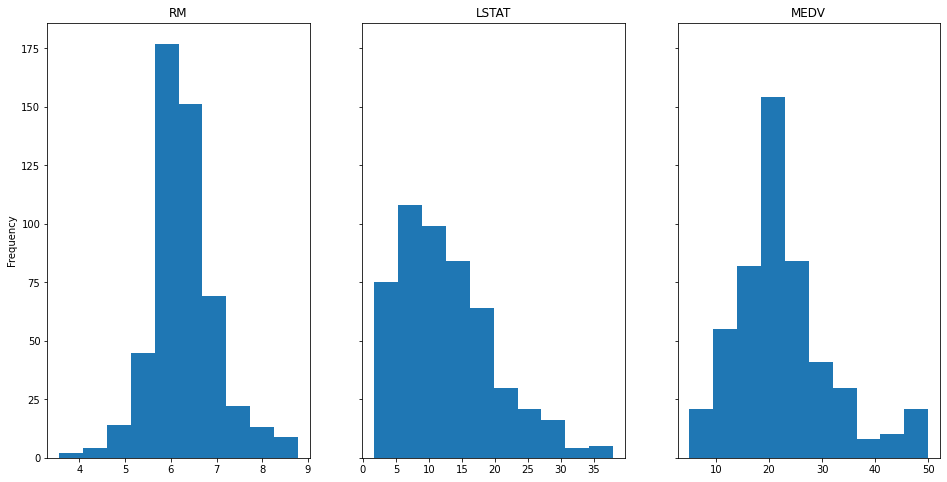

In [52]:
#PLOTTING A HISTOGRAM OF OUR FETURES 
fig, axs = plt.subplots(1,3, sharey =True)
df['RM'].plot(kind='hist',ax = axs[0], figsize = (16,8),title = 'RM')
df['LSTAT'].plot(kind='hist', ax = axs[1],title = 'LSTAT')
df['MEDV'].plot(kind='hist', ax = axs[2],title = 'MEDV');

<AxesSubplot:>

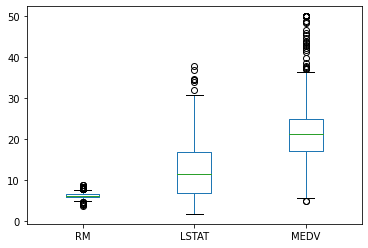

In [48]:
#testin to view outliers
df[['RM','LSTAT','MEDV']].plot(kind = 'box')

In [50]:
#statuistical discription of our features
df[['RM','LSTAT','MEDV']].describe()

,RM,LSTAT,MEDV
count,506.000000,506.000000,506.000000
mean,6.284634,12.653063,22.532806
std,0.702617,7.141062,9.197104
min,3.561000,1.730000,5.000000
25%,5.885500,6.950000,17.025000
50%,6.208500,11.360000,21.200000
75%,6.623500,16.955000,25.000000
max,8.780000,37.970000,50.000000


In [53]:
#Creating X and Y
X = df[['RM','LSTAT']]
y = df.MEDV

In [56]:
#testing for multicolinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

#scaling data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.60452,RM
1,1.60452,LSTAT


### the vif is less than 5 so we can proceed with our training

In [57]:
#splitting the data set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(X,y,test_size=0.33,random_state= 20)

In [58]:
#fitting data to linear regression model
from sklearn import linear_model
reg =linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#calculating the acuracy of the model
from sklearn.metrics import r2_score
score = r2_score(test_y,reg.predict(test_x))
score

0.573013065808019

In [62]:
# model evaluation for training set
from sklearn.metrics import mean_squared_error
y_train_predict = reg.predict(train_x)
rmse = (np.sqrt(mean_squared_error(train_y, y_train_predict)))
r2 = r2_score(train_y, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = reg.predict(test_x)
rmse = (np.sqrt(mean_squared_error(test_y, y_test_predict)))
r2 = r2_score(test_y, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.2999249661515195
R2 score is 0.6659447912407055


The model performance for testing set
--------------------------------------
RMSE is 6.012293443189538
R2 score is 0.573013065808019
